# Creating a model to predict the selling price of the cars

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## data aquasition

In [2]:
df=pd.read_csv('C:\\Users\\prane\\OneDrive\\Documents\\Documents\\machine learning\\car data.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


first 5 rows of  the data set

In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


last 5 rows of the dataset

In [5]:
df.shape

(301, 9)

there are 301 rows and 9 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

this show the datatpyes of the respective features

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [10]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

from the above results we can see ther are no missing values

In [13]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

shows the unique values present in respective columns

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Univariate analysis

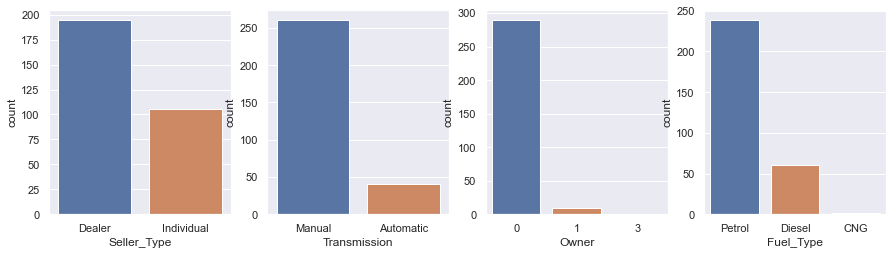

In [15]:
sns.set(rc={'figure.figsize':(15,8.27)})

plt.subplot(241)

sns.countplot(x='Seller_Type',data=df)

plt.xticks(rotation=0)

plt.subplot(242)

sns.countplot(x='Transmission',data=df)

plt.xticks(rotation=0)

plt.subplot(243)

sns.countplot(x='Owner',data=df)



plt.subplot(244)
              
sns.countplot(x='Fuel_Type',data=df)

plt.show()


### Observation from above plots
    1.Sellers prefer to sale the cars through dealers.
    2.Manual Vehicles dominated high in selling comaparitive to automatic.
    3.Most of the vehicles are 1st hand vehicles. very less are second hand vehicles came to sale.
    4.Petrol engines are high compared to diesel and cng.

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

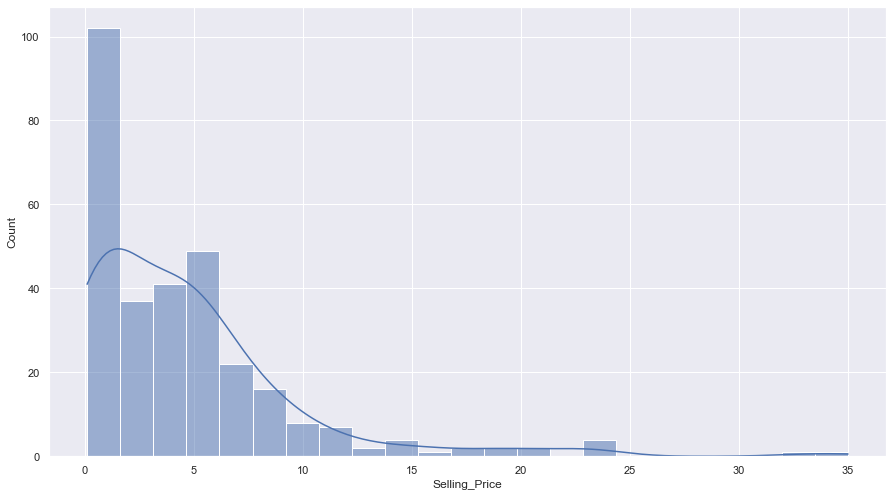

In [16]:
sns.histplot(data=df, x="Selling_Price", kde=True)

Majority of the selling prace range from 0 to 5. The distribution is possitively inclined.

<AxesSubplot:xlabel='Present_Price', ylabel='Count'>

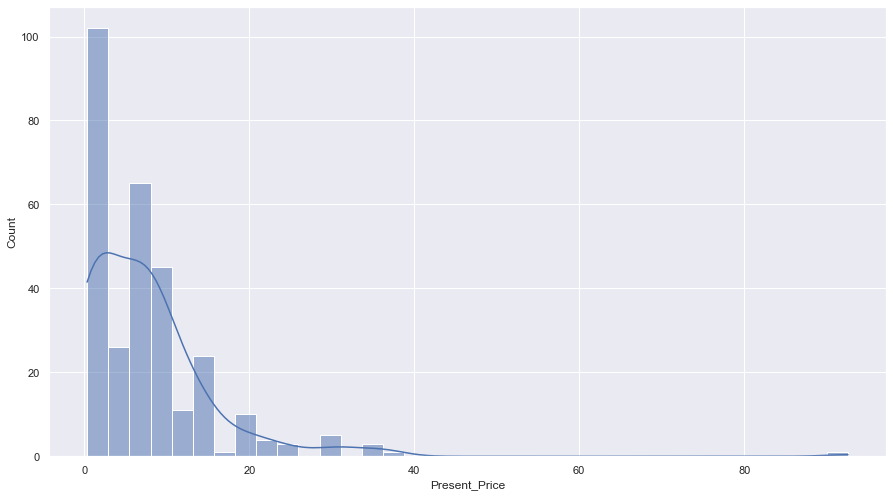

In [17]:
sns.histplot(data=df, x="Present_Price", kde=True)

majority present price of the cars range between 0 to 20.

## Multivariate analysis

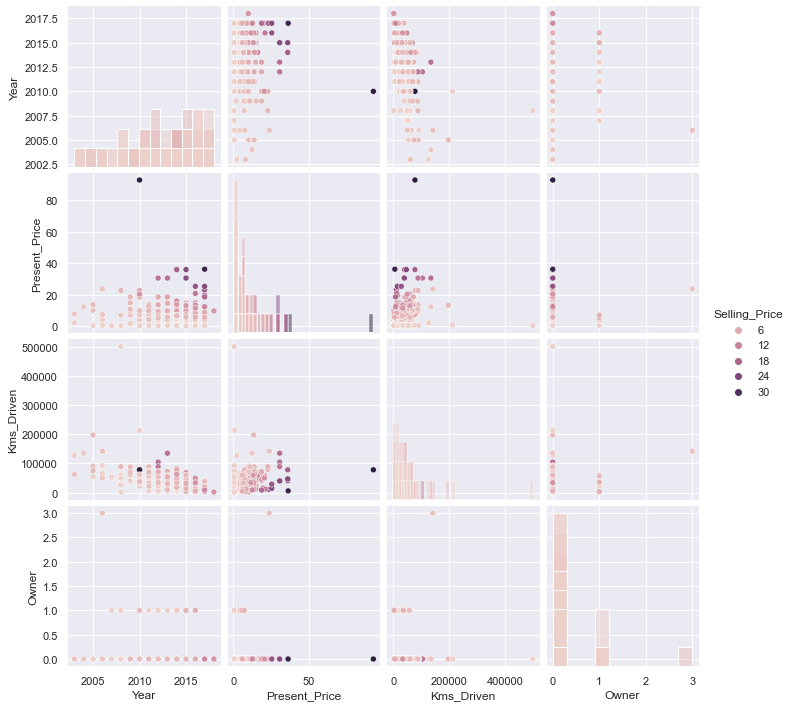

In [18]:
sns.pairplot(df, hue="Selling_Price", diag_kind="hist")

## finding the correlation among the features.

<AxesSubplot:>

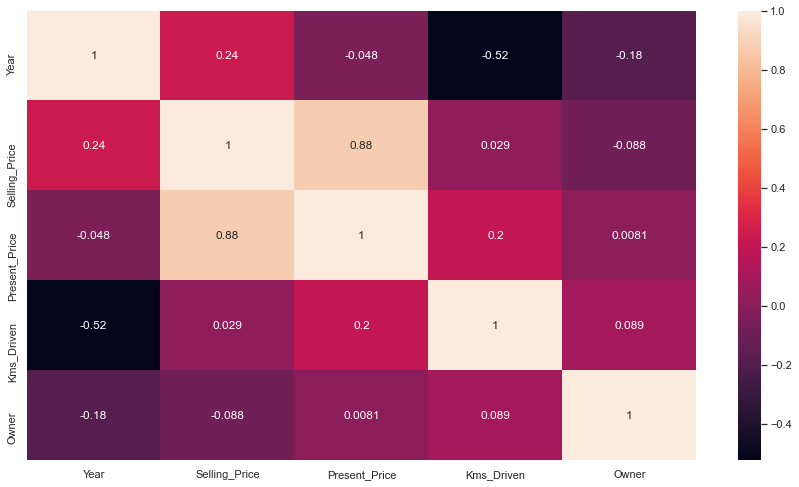

In [19]:
sns.heatmap(df.corr(),annot=True)

## Lets work on Outliers

<AxesSubplot:>

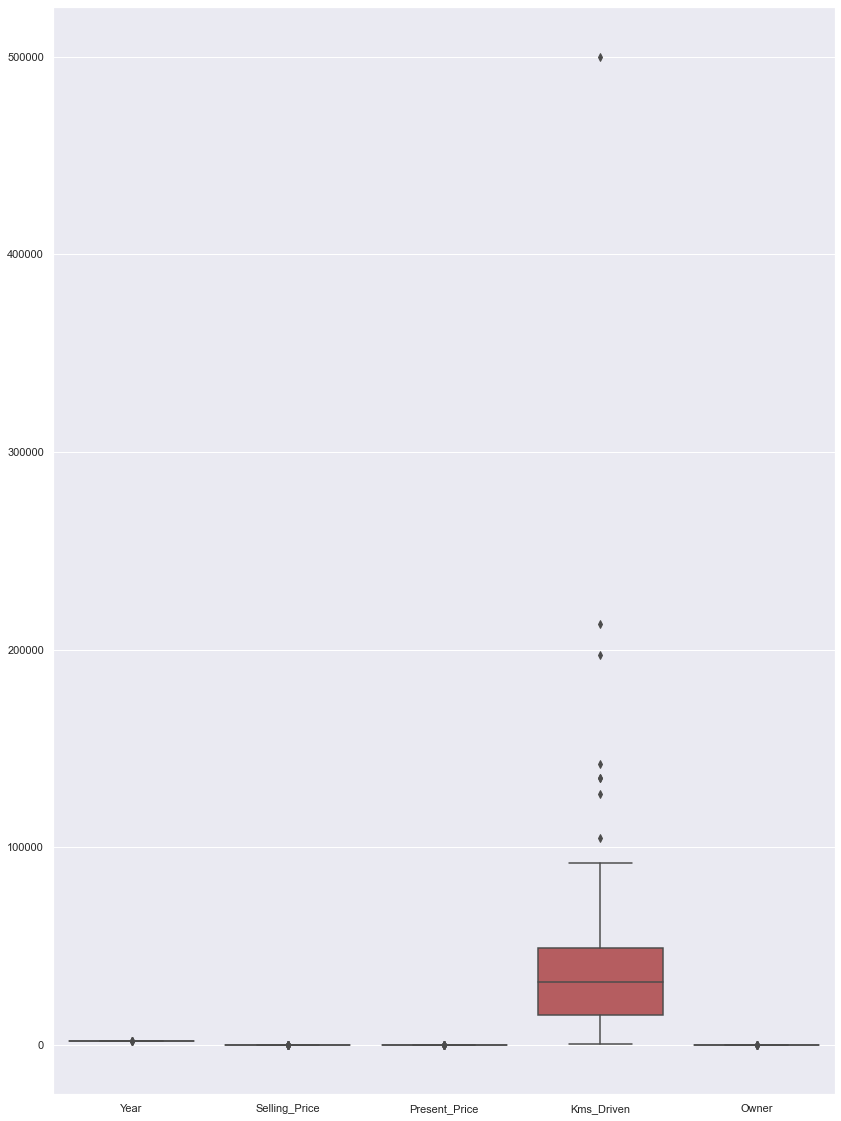

In [20]:
plt.figure(figsize=(14, 20)) 
sns.boxplot(data=df)

As the datapoints are not abnormal, we can consider the values are perfectly correct.

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
# Now lets find the age of the car.( how  old the car is)

In [23]:
# lets add a feature called current year.
df['Current_year']=2021

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [25]:
# now lets subtract the current year with year to find the age of the car.Save it in Age of car.
df['Age_of_Car']=df['Current_year']-df['Year']


In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Age_of_Car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


from the above results we can see that age of the car is add.

In [27]:
# now lets delete the unnecessary features

In [28]:
df.drop(['Car_Name','Year','Current_year'],inplace=True,axis=1)

In [29]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [30]:
# now the final dataset is clean and clear.

## lets convert categorical values into numerical using label encoder.

In [31]:
# importing library for label encoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [32]:
df['Fuel_Type']=le.fit_transform(df.Fuel_Type)
# 0=CNG,1=Diesel,2=Petrol

In [33]:
df['Seller_Type']=le.fit_transform(df.Seller_Type)
# 0=dealer,1=Individual

In [34]:
df['Transmission']=le.fit_transform(df.Transmission)
# 0=Automatic, 1= Manual

In [35]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,2,0,1,0,7
1,4.75,9.54,43000,1,0,1,0,8
2,7.25,9.85,6900,2,0,1,0,4
3,2.85,4.15,5200,2,0,1,0,10
4,4.60,6.87,42450,1,0,1,0,7


In [36]:
df.dtypes

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
Age_of_Car         int64
dtype: object

In [37]:
# Hence we have converted over features into numerical.

<AxesSubplot:>

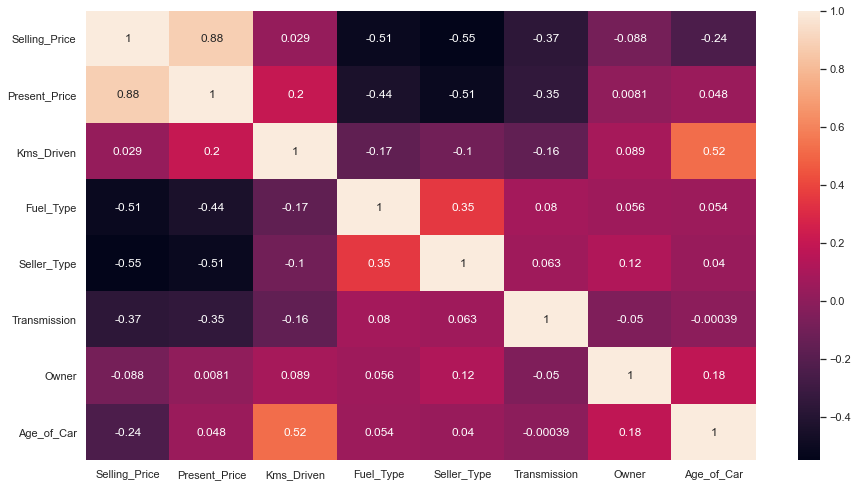

In [38]:
sns.heatmap(df.corr(),annot=True)

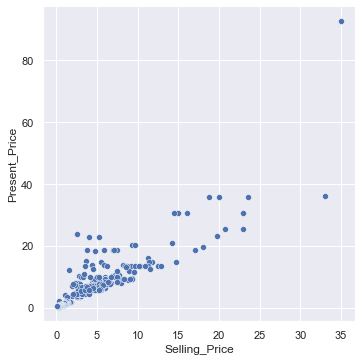

In [39]:
# lets find the relation between features.
sns.relplot(x='Selling_Price',y='Present_Price',data=df)

seems linear in relation

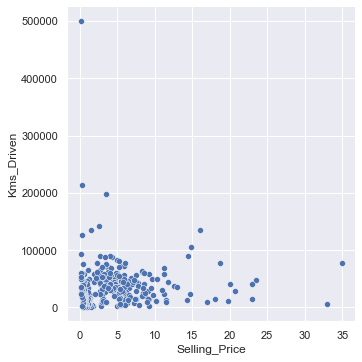

In [40]:
sns.relplot(x='Selling_Price',y='Kms_Driven',data=df)

# Develop a model

 ### steps to follow to develop a model.
    1.Get the data ready.
    2.pick the model.
    3.fit the data  into the model.
    4.Evaluate the model.
    5.Improve the model.

In [41]:
# geting the data ready.
## Dependent feature
y=df['Selling_Price']

In [42]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [43]:
# independent features
x=df.drop('Selling_Price',axis=1)

In [44]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,5.59,27000,2,0,1,0,7
1,9.54,43000,1,0,1,0,8
2,9.85,6900,2,0,1,0,4
3,4.15,5200,2,0,1,0,10
4,6.87,42450,1,0,1,0,7
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,5
297,5.90,60000,2,0,1,0,6
298,11.00,87934,2,0,1,0,12
299,12.50,9000,1,0,1,0,4


In [45]:
# lets pick a model
#As we are dealing with regession problem and few features shows linear relationship.
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
# lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [47]:
# lets fit the data into the model.
lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
# Initiating the model score.
lr.score(X_train,Y_train)

0.8741731316387884

In [49]:
# Evaluate the model score
lr.score(X_test,Y_test)

0.8650320546211195

In [50]:
# as both the train and test score seems fine. lets try to improve the model.

## Hypertuning the model

In [51]:
lr.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [52]:
lrh=LinearRegression()

In [53]:
lrh.get_params(deep=bool)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [54]:
lrh.set_params(copy_X=False, fit_intercept=True, n_jobs=4, normalize=True)

LinearRegression(copy_X=False, n_jobs=4, normalize=True)

In [55]:
# lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [56]:
# lets fit the data into the model.
lrh.fit(X_train,Y_train)

LinearRegression(copy_X=False, n_jobs=4, normalize=True)

In [57]:
lrh.score(X_train,Y_train)

0.8741731316387884

In [58]:
lrhs=lrh.score(X_test,Y_test)
lrhs

0.8650320546211387

## evaluating the model

In [59]:
# to evaluate the linear regression model we use R2, RMSE,MSE

In [60]:
# To evaluate the model, first we need to pridict the values.

In [61]:
y_preds= lr.predict(X_train)

In [62]:
y_preds

array([ 2.91500973e+00,  8.27364427e+00,  9.76959171e+00,  1.89107072e+00,
        7.63785399e+00,  7.90023783e-01,  4.40318020e+00,  2.46519654e+00,
        4.96705076e+00,  3.36548252e+00,  4.79684095e+00,  5.91932831e-01,
        5.90693459e+00,  4.49628571e+00,  5.62142445e+00,  4.47750978e+00,
        8.58541514e+00, -2.26004531e+00, -4.16940537e+00,  9.99904906e+00,
        1.75870582e+00,  7.33482043e+00,  7.03837851e+00,  4.57169201e+00,
        4.72079380e+00,  7.29090667e+00,  4.81487293e+00,  2.71105560e+00,
        2.68964302e+00,  6.84931060e+00,  8.45949117e+00,  1.10969018e+00,
        4.72752484e+00,  6.49173800e+00,  9.25975454e+00,  9.24550470e+00,
        4.40224669e+00,  3.56831752e+00,  8.12579878e+00,  6.02154901e+00,
        4.88745607e+00,  8.71432850e+00,  4.91360462e-01,  1.58641696e+00,
        6.81040025e-02,  8.81068201e+00,  8.30088497e+00,  2.52780860e+00,
        3.07906690e-01,  4.30100304e+00,  9.69867033e+00,  3.29784438e+00,
        2.69193269e+00,  

In [63]:
from sklearn.metrics import r2_score
r2_score(Y_train,y_preds)

0.8741731316387884

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train,y_preds)


3.2003315854853454

In [65]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_train,y_preds))
rmse

1.788947060559743

In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_train, y_preds)

1.1503786345165021

In [67]:
# The score of Linear regression model is doing great.

In [68]:
# Lets try developing other models

## Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf= RandomForestRegressor()

In [71]:
# lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [72]:
# fitting the data into the model
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [73]:
# initiating the model score
rf.score(X_train,Y_train)

0.9856333878995879

In [74]:
#Evaluating the model score
rfs=rf.score(X_test,Y_test)
rfs

0.9678451189985098

### improving the model by RandomSearchCV

In [75]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:

from sklearn.model_selection import RandomizedSearchCV

In [77]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [78]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [79]:
rf_grid={'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
       'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf}
print(rf_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [80]:
rfr=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,cv=5,n_iter=20,verbose=True,random_state=42,n_jobs=1)

In [81]:
rfr.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [82]:
rfr.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=True)

In [83]:
rfr.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [84]:
rfr.score(X_train,Y_train)

0.9700778603680381

In [85]:
rfr.score(X_test,Y_test)


0.9509979721826767

In [86]:
# After hypertuning the model using RandomsearchCV scores went down, So however the base model Score perfect.

## Evaluating Random Forest Regression

In [87]:
from sklearn.metrics import r2_score

In [88]:
y_pred=rf.predict(X_train)

In [89]:
r2_score(Y_train,y_pred)

0.9856333878995879

In [90]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train,y_preds)

3.2003315854853454

In [91]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_train,y_preds))
rmse

1.788947060559743

In [92]:
scores={'Linear regression':lrhs,'RandomForest':rfs}

In [93]:
scores_data=pd.DataFrame(scores,index=['test_results'])

In [94]:
scores_data

,Linear regression,RandomForest
test_results,0.865032,0.967845


<AxesSubplot:>

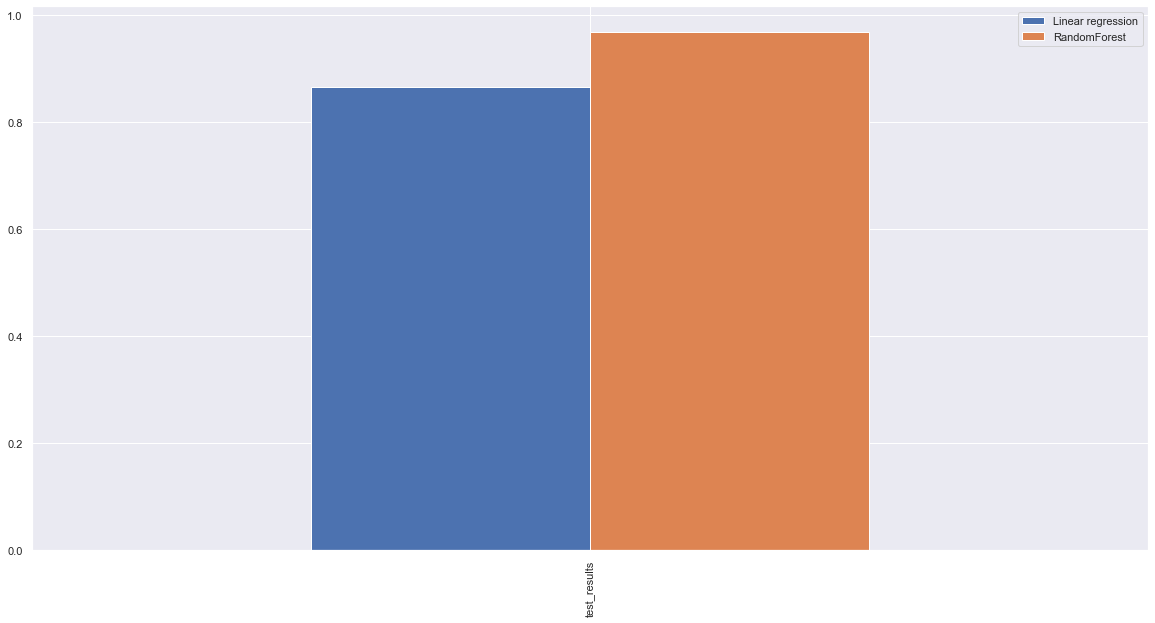

In [95]:
scores_data.plot.bar(figsize=(20,10))

In [96]:
# random forest regression has the best score of train and test.